In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,confusion_matrix
from sklearn.decomposition import PCA

In [3]:
# Load the wine dataset

wine = load_wine()
X = pd.DataFrame(wine.data,columns=wine.feature_names)
y = wine.target

print(X)
print(X.info())
print(X.describe())
print(X.shape)

print(y)
print(y.shape)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]
<cl

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Silhouette Score')

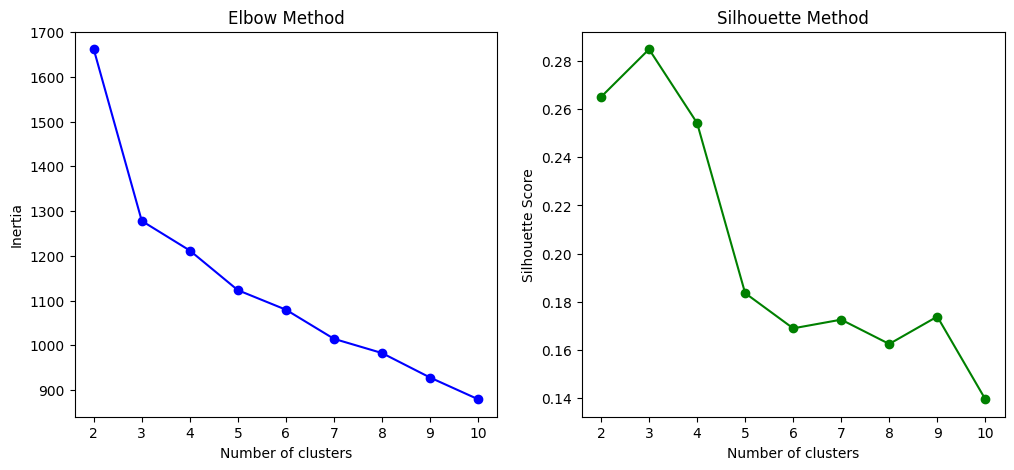

In [5]:
inertia = []
silhouette = []
K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))

#Plot

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(K,inertia,'bo-')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

ax[1].plot(K,silhouette,'go-')
ax[1].set_title('Silhouette Method')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')